## Excercises

### Conceptual

  
For each of parts (a) through (d), indicate whether we would generally
expect the performance of a flexible statistical learning method to be
better or worse than an inflexible method. Justify your answer.
1. The sample size n is extremely large, and the number of predictors p is small.
2. The number of predictors p is extremely large, and the number
of observations n is small.
3. The relationship between the predictors and response is highly
non-linear.
4. The variance of the error terms, i.e. σ2 = Var(ϵ), is extremely
high.

1. Would expect a flexible method to perform well. n is very large, so there is less of a risk of overfitting to noise. Further the issue of sparsity cuased by the 'curse of dimensionality' will not araise since p is small
2.  Inflexable method such as LM, or KNN with a large hyperparam. n is small so we risk fitting to noise. 
3.  We will need some flexiblity to account for this non-linearity. A LM with higher order terms may suffice. Or a tree based (parametric) method can provice arbitrary flexibility if needed. 
4.  Inflexable model. 

### Applied

#### Q8

In [58]:
import pandas as pd
import numpy as np
import plotnine as pn
from plotnine import ggplot, aes,geom_point, geom_col, theme, geom_point, scale_x_continuous, scale_y_continuous, geom_histogram, geom_line, labs

college = pd.read_csv("data/College.csv")
college.head(3)


,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54


In [4]:
college.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


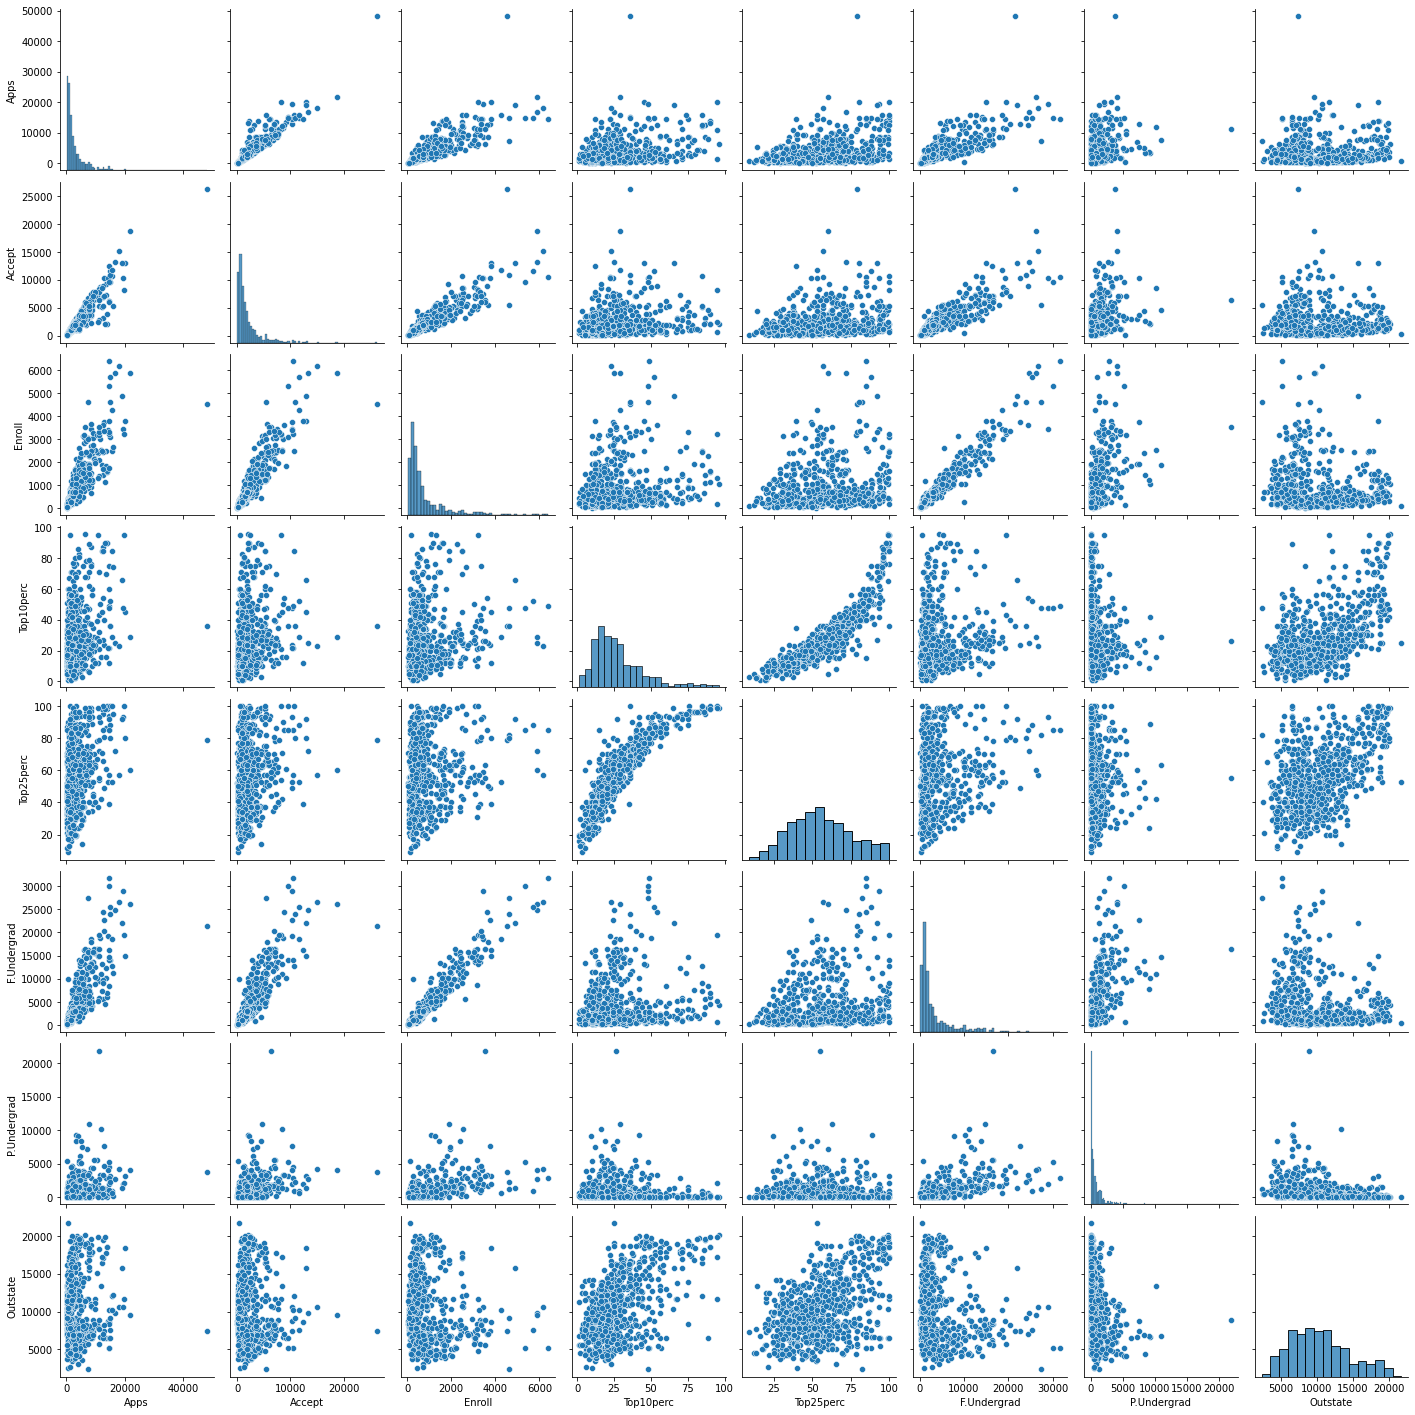

In [16]:
import seaborn as sns
sns.pairplot(college.iloc[:,1:10])

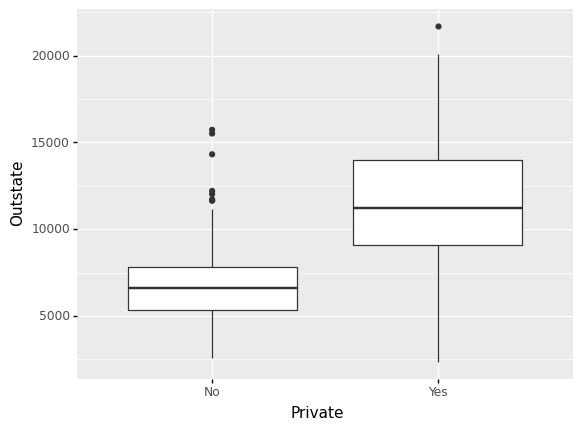

<ggplot: (311938554)>

In [19]:
(
    ggplot(college)+
    pn.geom_boxplot(aes('Private','Outstate'))+
    theme()
)

In [24]:
college = college.assign(elite = lambda df: pd.cut(df.Top10perc,[0,50,100],labels=['0-50','50-100']))
college.head(1)

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,elite
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,0-50


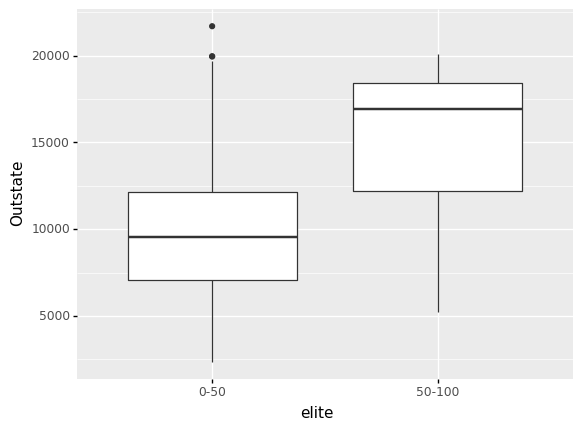

<ggplot: (312989871)>

In [27]:
(
    ggplot(college)+
    pn.geom_boxplot(aes('elite','Outstate'))+
    theme()
)

#### Q9

In [44]:
import os 
auto = pd.read_csv("data/Auto.csv")
auto.head(3)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite


In [45]:
# no NAs here
auto.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
year            0
origin          0
name            0
dtype: int64

In [55]:
auto.describe().loc[['min','mean','max'],:].transpose()

,min,mean,max
mpg,9.0,23.515869,46.6
cylinders,3.0,5.458438,8.0
displacement,68.0,193.532746,455.0
weight,1613.0,2970.261965,5140.0
acceleration,8.0,15.555668,24.8
year,70.0,75.994962,82.0
origin,1.0,1.574307,3.0


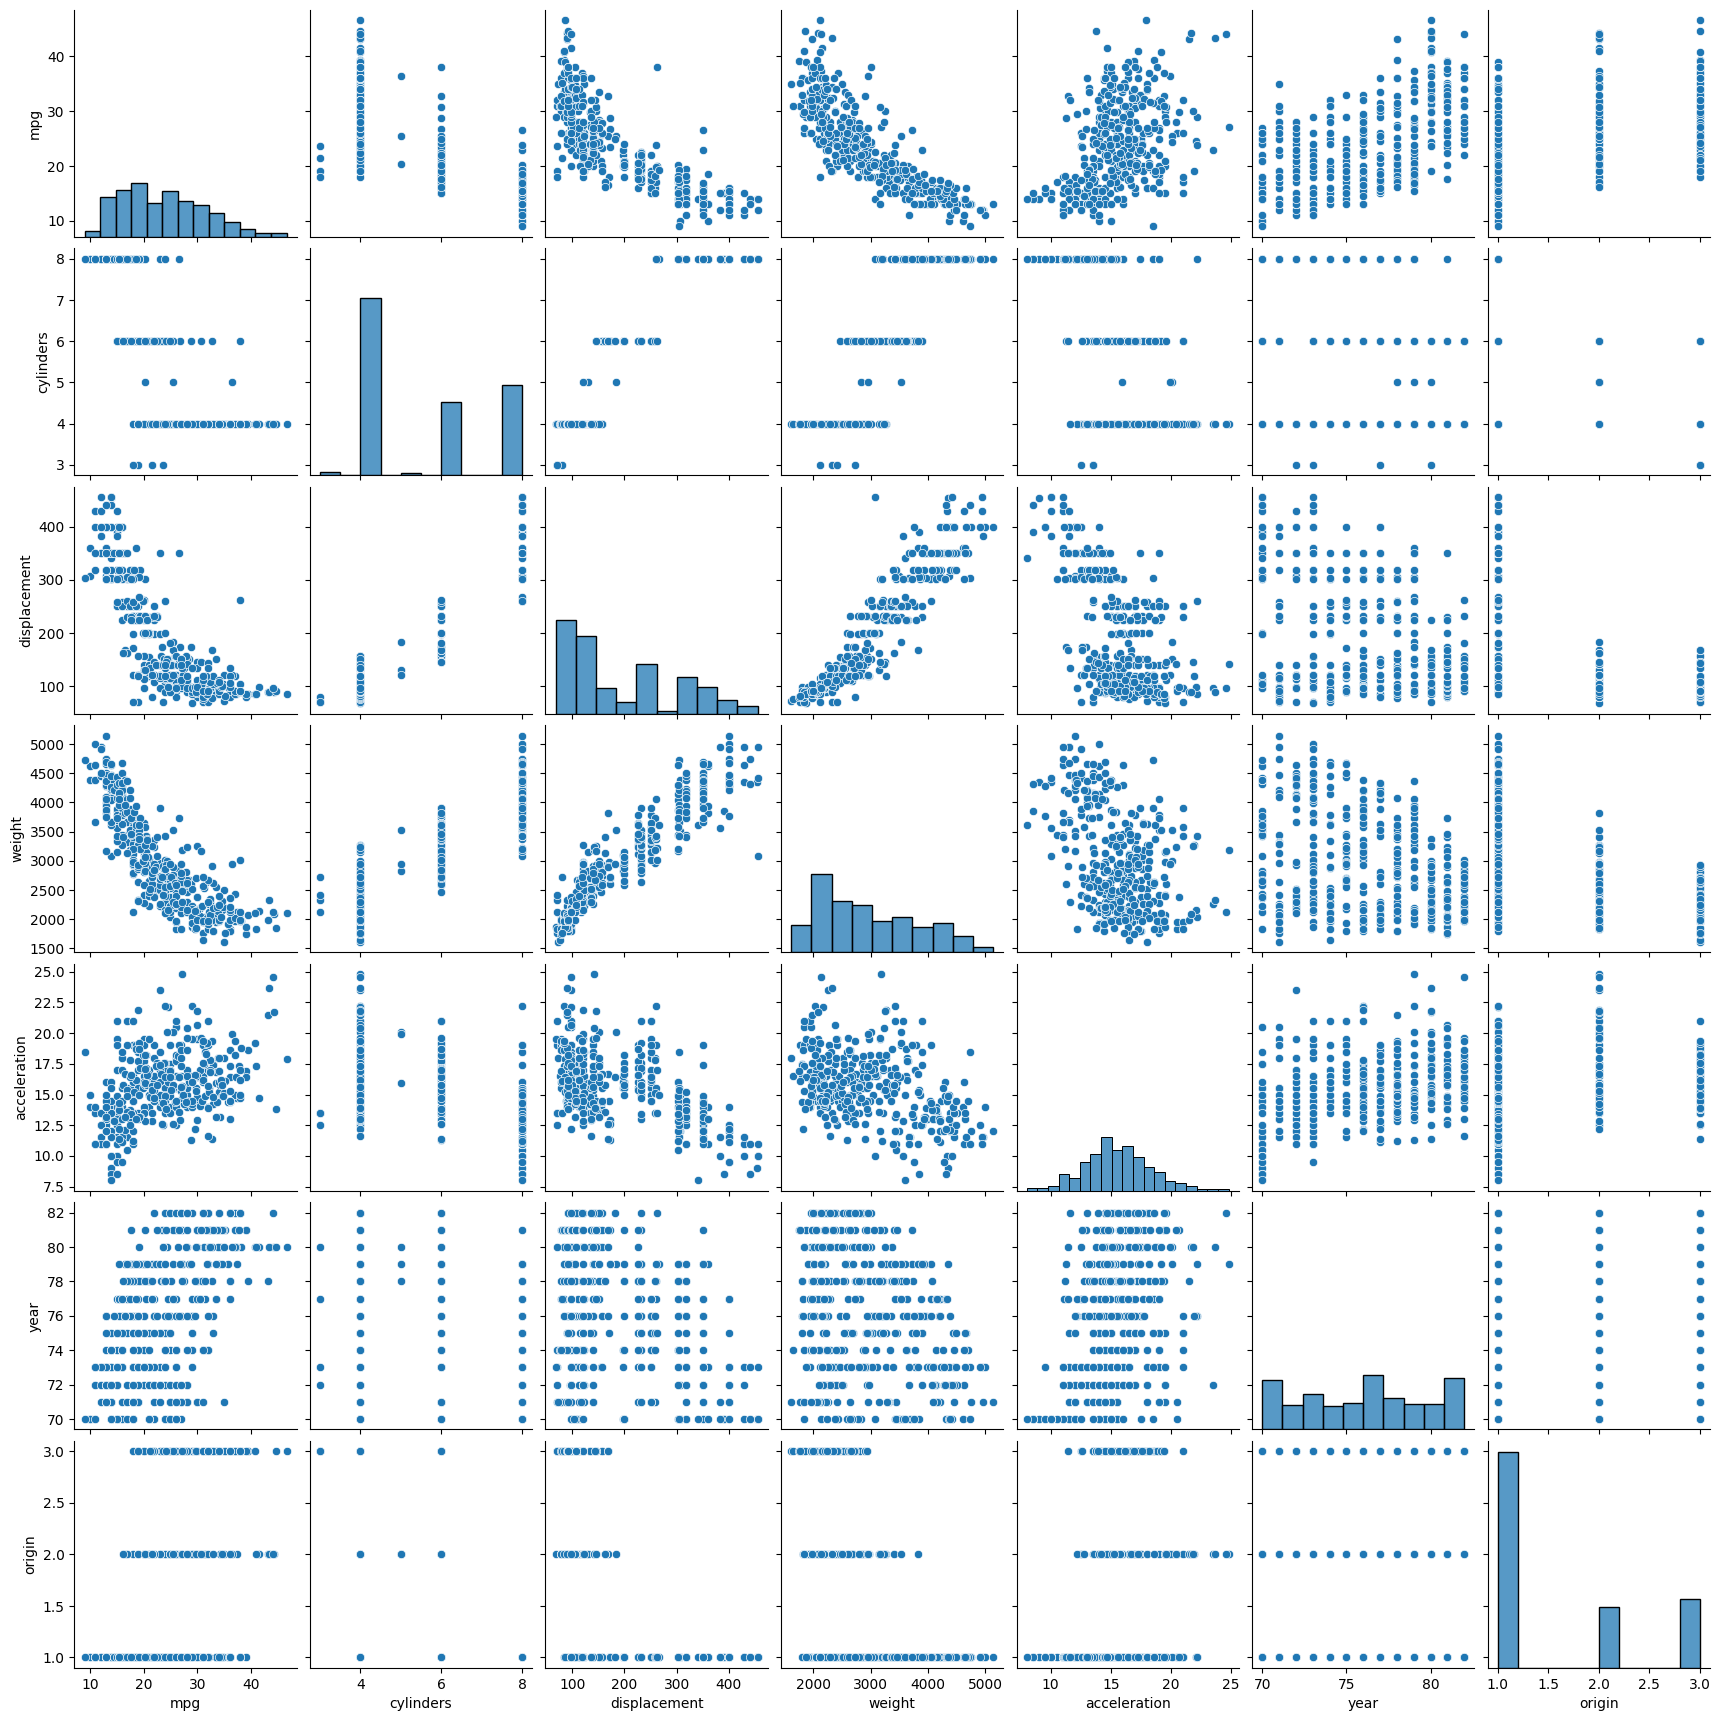

In [61]:
sns.pairplot(auto.select_dtypes(include=np.number) )